Importing libraries

In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbs
%matplotlib inline    
from sklearn.model_selection import GridSearchCV 

Loading datasets and processing

In [296]:
colony_dataset = pd.read_csv('/content/drive/MyDrive/Hackathon/Colony Dataset.csv')
x = colony_dataset.drop(['Colony Name','Probability of getting stuck'],axis = 'columns')
y = colony_dataset[['Probability of getting stuck']]
colony_dataset.head()

,Colony Name,Number of people in the colony,Facility rating of the colony,Flood Intensity of the area,Distance from water bodies,Altitude of the colony,Probability of getting stuck
0,KK Nagar,30000,37,99,3537,4334,0.674075
1,Navalpattu,50000,9,27,6650,986,0.428330
2,Bharathi Nagar,30000,35,58,4080,2661,0.505030
3,Shanmuga Nagar,12000,27,23,698,871,0.207600
4,Kumaran Nagar,51222,79,64,8154,967,0.706208


Various parameters vs results

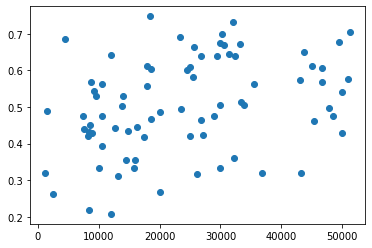

In [297]:
plt.scatter(colony_dataset['Number of people in the colony'],colony_dataset['Probability of getting stuck'])

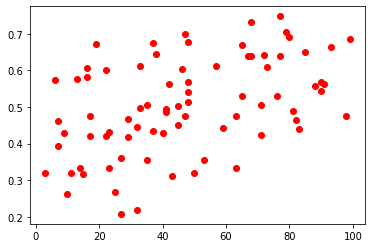

In [298]:
plt.scatter(colony_dataset['Facility rating of the colony'],colony_dataset['Probability of getting stuck'],color = 'Red')


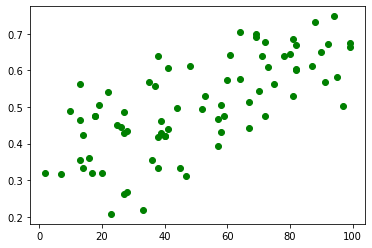

In [299]:
plt.scatter(colony_dataset['Flood Intensity of the area'],colony_dataset['Probability of getting stuck'],color = 'green')


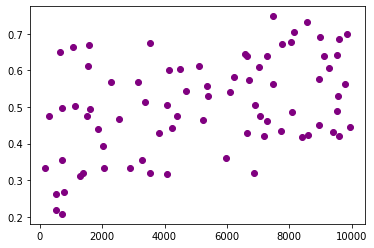

In [300]:
plt.scatter(colony_dataset['Distance from water bodies'],colony_dataset['Probability of getting stuck'],color = 'purple')

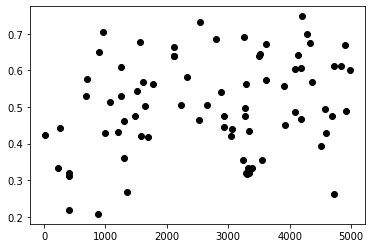

In [301]:
plt.scatter(colony_dataset['Altitude of the colony'],colony_dataset['Probability of getting stuck'],color = 'black')

In [302]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

Scaling features for better accuracy

In [303]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
y_train_scaled = scaler.fit_transform(y_train)
y_train = pd.DataFrame(y_train_scaled)

Support Vector Regression (SVR) implementation

In [304]:
from sklearn.svm import SVR
model = SVR(kernel = 'rbf')
model.fit(x_train,y_train)
model.score(x_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


-0.06937824120629843